In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/car_price_dataset.csv")
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols, cat_but_car
    

cat_cols,num_cols,cat_but_car = grab_col_names(df)
cat_cols
num_cols
cat_but_car

['Model']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


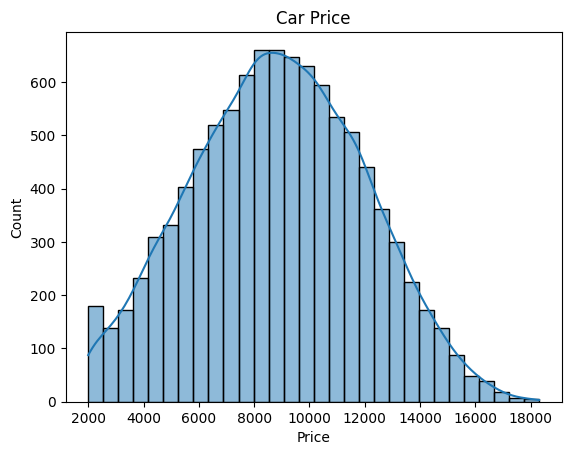

In [5]:
plt.figure()
sns.histplot(df["Price"],kde=True,bins=30)
plt.title("Car Price")
plt.show()

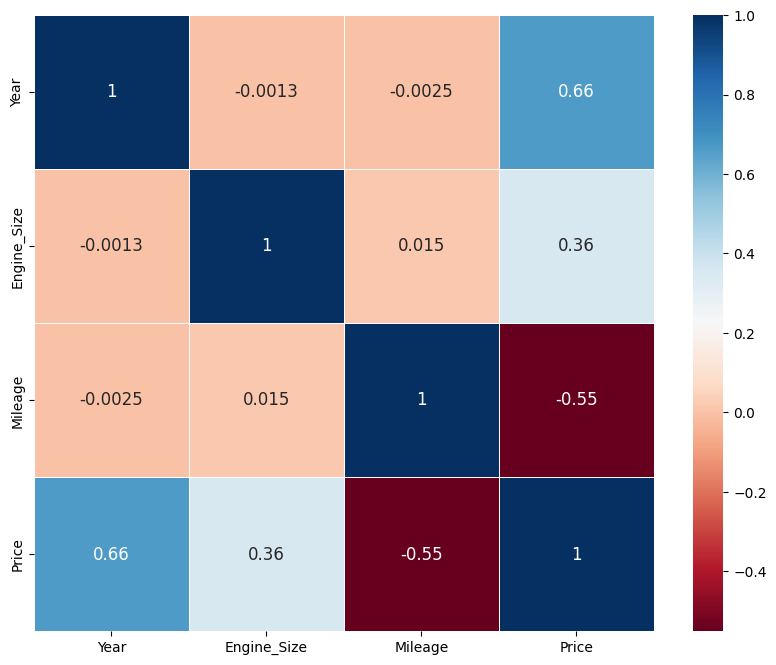

In [6]:
def corelation_matrix(dataframe,cols):    
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

corelation_matrix(df,num_cols)

In [7]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)
df.head()

,Model,Year,Engine_Size,Mileage,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Transmission_Semi-Automatic,Doors_2,Doors_3,Doors_4,Doors_5,Owner_Count_1,Owner_Count_2,Owner_Count_3,Owner_Count_4,Owner_Count_5
0,Rio,2020,4.2,289944,8501,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,Malibu,2012,2.0,5356,12092,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,GLA,2020,4.2,231440,11171,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,Q5,2023,2.0,160971,11780,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4,Golf,2003,2.6,286618,2867,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [8]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df[num_cols])
df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)
df.head()

,Model,Year,Engine_Size,Mileage,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Transmission_Semi-Automatic,Doors_2,Doors_3,Doors_4,Doors_5,Owner_Count_1,Owner_Count_2,Owner_Count_3,Owner_Count_4,Owner_Count_5
0,Rio,1.226021,1.043657,1.630075,-0.113083,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,Malibu,0.066156,-0.870607,-1.666895,1.040674,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,GLA,1.226021,1.043657,0.952303,0.744764,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,Q5,1.660970,-0.870607,0.135915,0.940431,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4,Golf,-1.238692,-0.348535,1.591543,-1.923238,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [9]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols, cat_but_car
    

cat_cols,num_cols,cat_but_car = grab_col_names(df)
cat_cols
num_cols
cat_but_car
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [10]:
df.head()

,Model,Year,Engine_Size,Mileage,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Transmission_Semi-Automatic,Doors_2,Doors_3,Doors_4,Doors_5,Owner_Count_1,Owner_Count_2,Owner_Count_3,Owner_Count_4,Owner_Count_5
0,Rio,1.226021,1.043657,1.630075,-0.113083,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,Malibu,0.066156,-0.870607,-1.666895,1.040674,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,GLA,1.226021,1.043657,0.952303,0.744764,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,Q5,1.660970,-0.870607,0.135915,0.940431,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,Golf,-1.238692,-0.348535,1.591543,-1.923238,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [11]:
df = df.drop(["Model"],axis=1)
X = df.drop(["Price"],axis=1)
y = df["Price"]

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)

lr_model=LinearRegression()
lr_model.fit(train_X,train_y)
y_pred = lr_model.predict(test_X)

mse = mean_squared_error(y_pred,test_y)
print("mse: ",mse)

mse:  0.0004334787993148507
